**1. IMPORT LIBRARY**

`uuid`: Digunakan untuk menghasilkan ID pada setiap node tree, sehingga node dengan nilai angka yang sama tidak dianggap sebagai node yang sama dalam graf.

`networkx`: Library untuk membuat, memanipulasi, dan mempelajari struktur graf kompleks.

`matplotlib`: Digunakan untuk menampilkan hasil visualisasi graf.

In [11]:
import uuid
import networkx as nx
import matplotlib.pyplot as plt

**2. Struktur Node (`TreeNode`)**



In [12]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []
        self.id = str(uuid.uuid4())

    def add_child(self, child_node):
        self.children.append(child_node)

**3. Logika Solver (`LISTreeSolver`)**

a) Fungsi `_recursive_build` memeriksa setiap elemen setelah indeks saat ini. Jika elemen tersebut lebih besar dari nilai node saat ini, maka child node akan dibuat dan proses berlanjut secara rekursif.

b) Menggunakan Depth First Search (DFS) melalui fungsi `_dfs_find_path` untuk menelusuri semua cabang dari root hingga leaf guna menemukan jalur dengan jumlah node terbanyak.

c) Fungsi `visualize_tree` mengonversi struktur `TreeNode` menjadi objek `DiGraph` (Directed Graph) milik `networkx`. Fungsi pembantu `_hierarchy_pos` digunakan untuk mengatur koordinat (x, y) setiap node agar membentuk struktur tree yang rapi dari atas ke bawah.

In [13]:
class LISTreeSolver:
    def __init__(self, sequence):
        self.sequence = sequence
        self.root = TreeNode(float('-inf'))

    def build_tree(self):
        self._recursive_build(self.root, -1)

    def _recursive_build(self, current_node, current_index):
        for next_index in range(current_index + 1, len(self.sequence)):
            next_value = self.sequence[next_index]

            if next_value > current_node.value:
                child_node = TreeNode(next_value)
                current_node.add_child(child_node)
                self._recursive_build(child_node, next_index)

    def find_longest_path(self):
        longest_path = []
        self._dfs_find_path(self.root, [], longest_path)
        return longest_path[1:]

    def _dfs_find_path(self, node, current_path, best_path):
        new_path = current_path + [node.value]

        if not node.children:
            if len(new_path) > len(best_path):
                best_path[:] = new_path
            return

        for child in node.children:
            self._dfs_find_path(child, new_path, best_path)

    def visualize_tree(self):
        G = nx.DiGraph()
        labels = {}

        queue = [self.root]
        while queue:
            node = queue.pop(0)
            node_label = "START" if node.value == float('-inf') else str(node.value)
            labels[node.id] = node_label

            for child in node.children:
                G.add_edge(node.id, child.id)
                queue.append(child)

        max_width = 0
        current_level = [self.root]
        while current_level:
            max_width = max(max_width, len(current_level))
            next_level = []
            for n in current_level:
                next_level.extend(n.children)
            current_level = next_level

        pos = self._hierarchy_pos(G, self.root.id, width=max_width*1.5)
        plt.figure(figsize=(25, 10))
        nx.draw_networkx_nodes(G, pos, node_size=800, node_color='#e6f2ff', edgecolors='#004080')
        nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', edge_color='#aaaaaa')
        nx.draw_networkx_labels(G, pos, labels=labels, font_size=9)

        plt.title(f"Decision Tree LIS (Max Width: {max_width} nodes)", fontsize=15)
        plt.axis('off')
        plt.show()

    def _hierarchy_pos(self, G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
        '''
        Fungsi ini tetap sama, tapi parameter 'width' saat dipanggil di atas
        sudah disesuaikan dengan jumlah node
        '''
        if not nx.is_tree(G):
            return nx.spring_layout(G)

        def _hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None):
            if pos is None:
                pos = {root: (xcenter, vert_loc)}
            else:
                pos[root] = (xcenter, vert_loc)

            children = list(G.neighbors(root))
            if not isinstance(G, nx.DiGraph) and parent is not None:
                children.remove(parent)

            if len(children) != 0:
                dx = width / len(children)
                nextx = xcenter - width/2 - dx/2
                for child in children:
                    nextx += dx
                    pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                        vert_loc=vert_loc-vert_gap, xcenter=nextx,
                                        pos=pos, parent=root)
            return pos

        return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


**4. Eksekusi dan Output**

Dibawah ini terdapat 2 Jenis Kode, Diantaranya dengan input statis atau dinamis. Statis menggunakan data yang ada pada soal. Kode Dinamis memungkinkan untuk menerima input diluar data yang disediakan pada soal

Membangun Tree...
Mencari Longest Path...
Longest Increasing Subsequence: [4, 7, 8, 11]
Menampilkan Visualisasi...


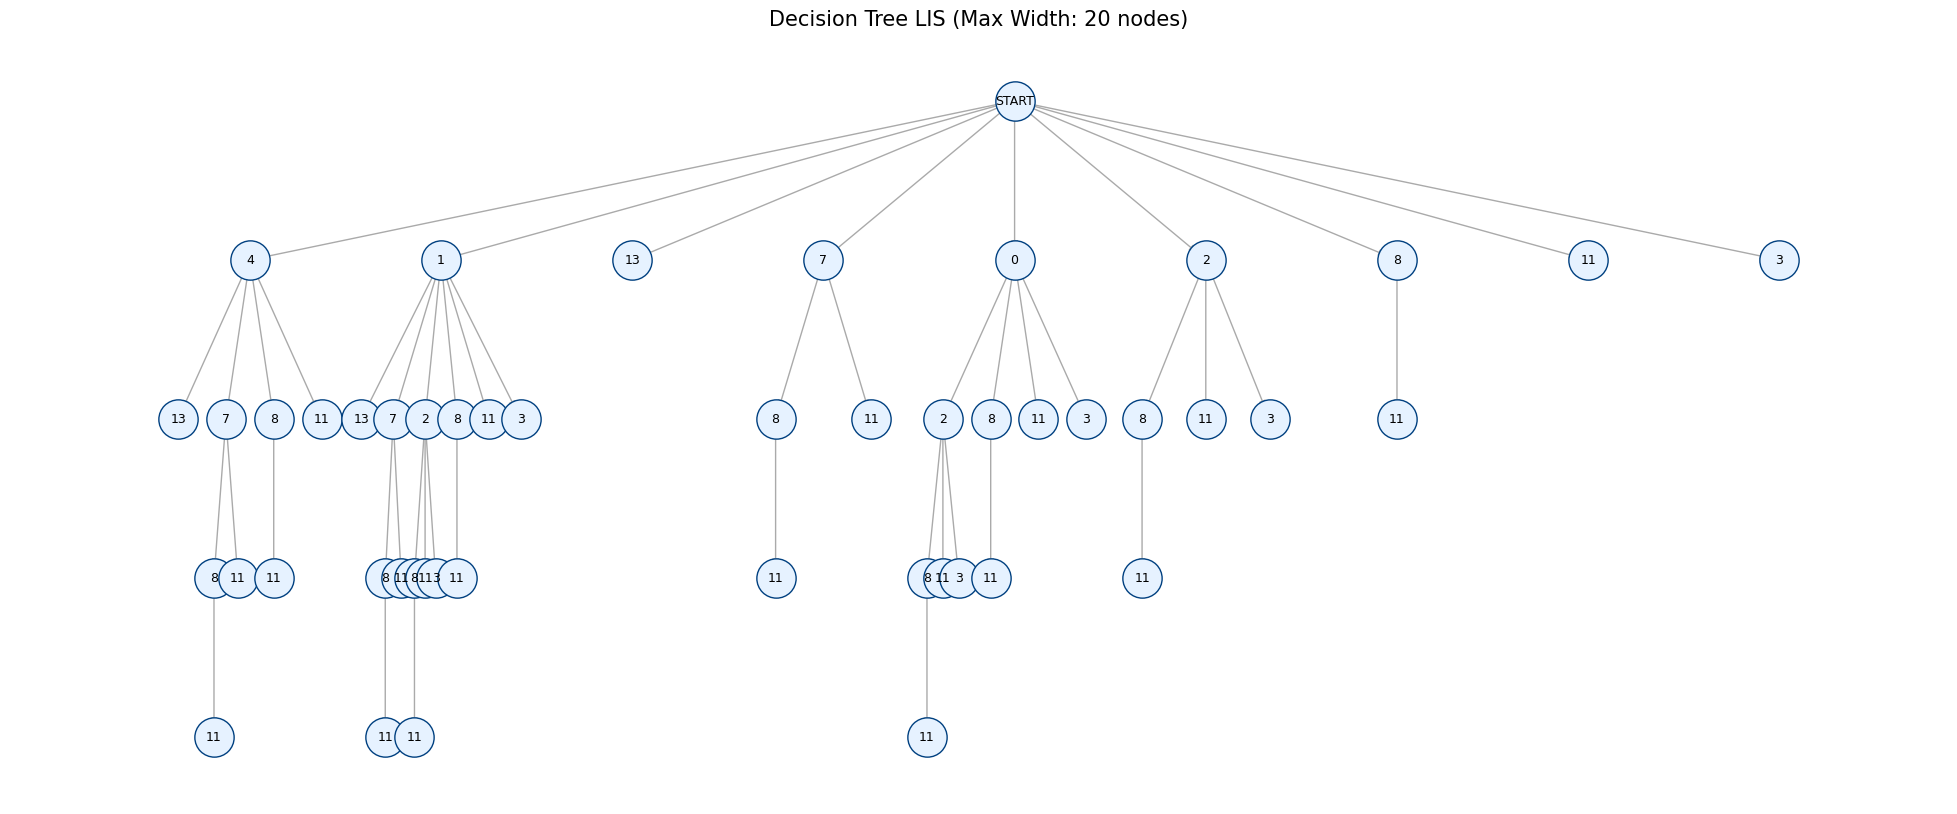

In [14]:
## Static Input (Sesuai arahan Soal)

if __name__ == "__main__":
    data = [4, 1, 13, 7, 0, 2, 8, 11, 3]

    solver = LISTreeSolver(data)
    print("Membangun Tree...")
    solver.build_tree()

    print("Mencari Longest Path...")
    result = solver.find_longest_path()

    print(f"Longest Increasing Subsequence: {result}")

    print("Menampilkan Visualisasi...")
    solver.visualize_tree()


Masukkan deretan angka (pisahkan dengan spasi): 1 2 4 5 7 8 10 3 6 9
Membangun Tree...
Mencari Longest Path...
Longest Increasing Subsequence: [1, 2, 4, 5, 7, 8, 10]
Menampilkan Visualisasi...


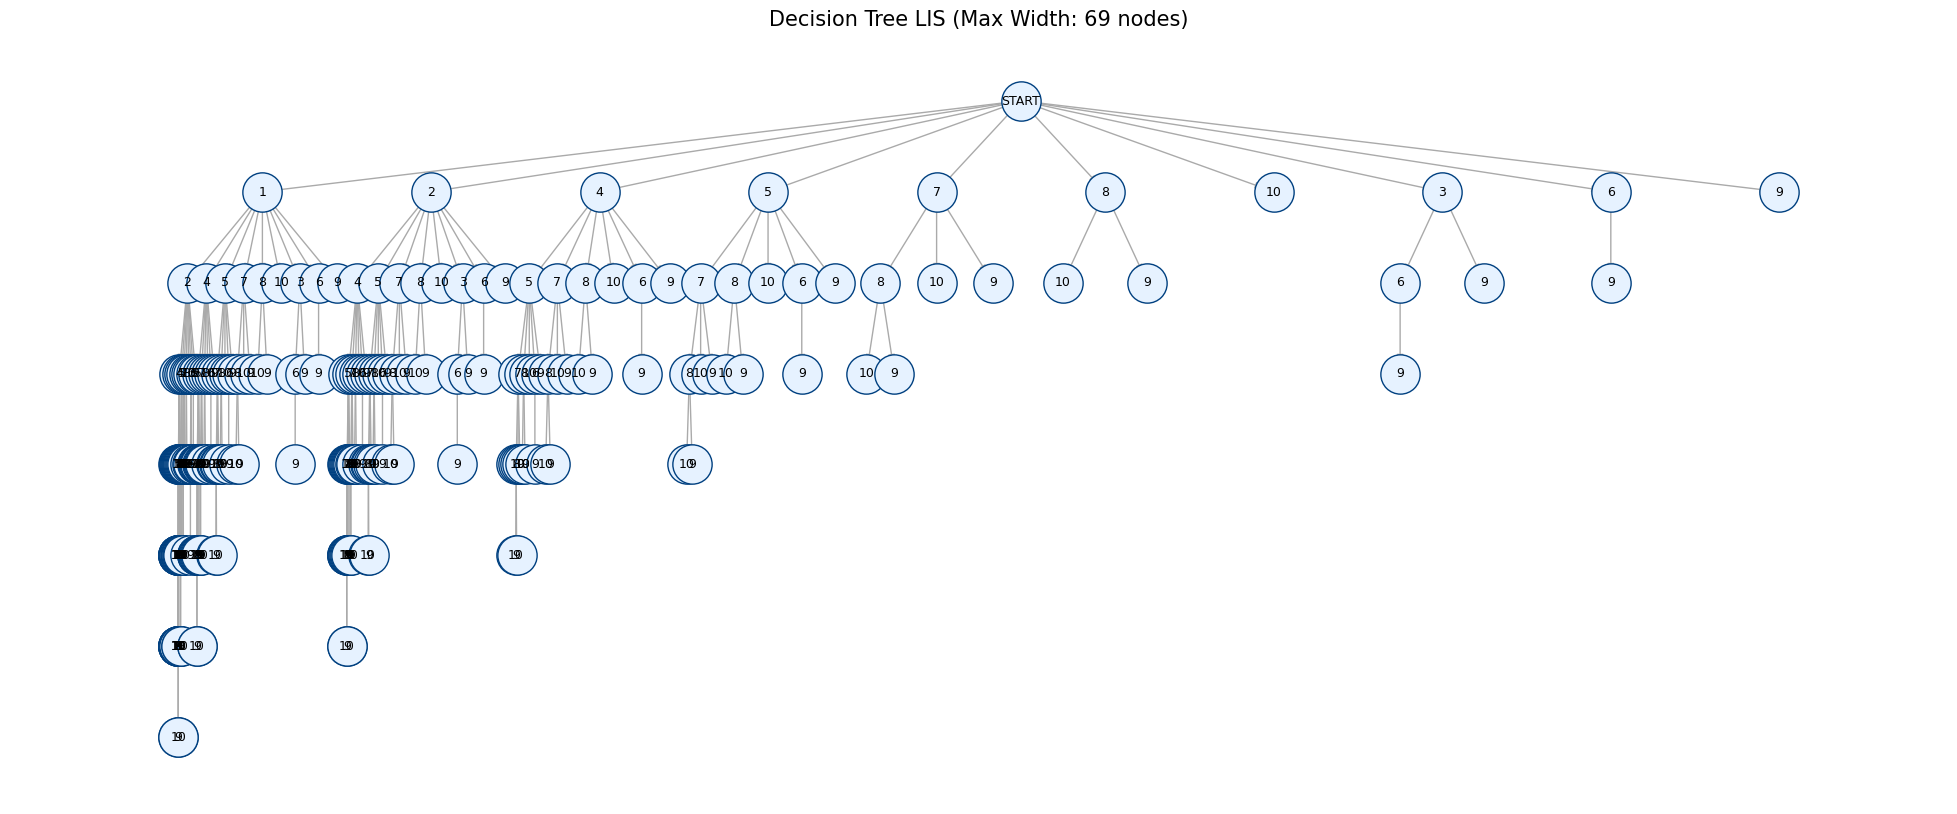

In [17]:
## Dynamic Input

if __name__ == "__main__":
    try:
        input_user = input("Masukkan deretan angka (pisahkan dengan spasi): ")

        data = [int(x) for x in input_user.split()]

        if not data:
            print("Error: Input tidak boleh kosong.")
        else:
            solver = LISTreeSolver(data)
            print("Membangun Tree...")
            solver.build_tree()

            print("Mencari Longest Path...")
            result = solver.find_longest_path()

            print(f"Longest Increasing Subsequence: {result}")

            print("Menampilkan Visualisasi...")
            solver.visualize_tree()

    except ValueError:
        print("Error: Harap masukkan angka saja yang dipisahkan dengan spasi.")